# Import the Necessary Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [2]:
data = pd.read_csv('ibm-hr-analytics-employee-attrition-performance (1).zip')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Data info

In [3]:
data.shape

(1470, 35)

In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

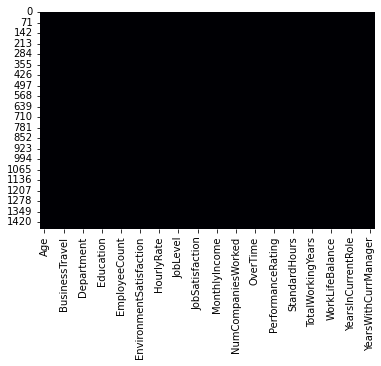

In [6]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

No null values present in the data!

In [7]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


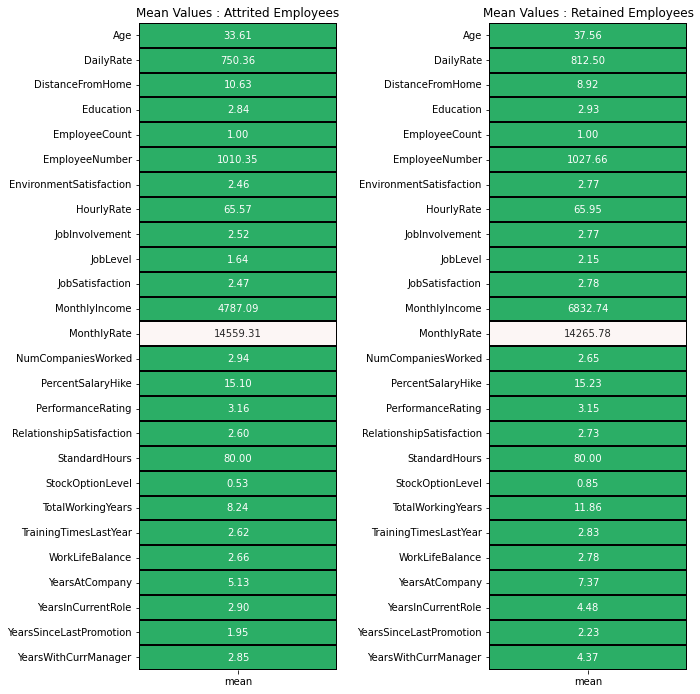

In [8]:
yes = data[data['Attrition'] == 'Yes'].describe().T
no = data[data['Attrition'] == 'No'].describe().T

colors = ['#2BAE66','#FCF6F5']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean Values : Attrited Employees');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean Values : Retained Employees');

fig.tight_layout(pad = 2)

Mean values of all the features for cases of Attrited Employees and Retained Employees.
When considering age, mean values of staying employees is 37.56 i.e more than the departing employess, 33.61.
Similarly, DailyRate & JobLevel is higher for staying employees than departing employees.
Staying employees have higher values for features : TotalWorkingYears, YearsAtCompany, YearsInCurrentRole & YearsWithCurrManager.

# Dividing features into Numerical and Categorical :

In [9]:
discrete_features = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
categorical_features = ['Attrition', 'BusinessTravel','Department', 'Education', 'EducationField', 'EmployeeCount','EmployeeNumber',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                    'MaritalStatus', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

df1 = data.copy(deep = True)

In [10]:
le = LabelEncoder()
l1 = []; l2 = []; text_categorical_features = []
print('Label Encoder Transformation')
for i in tqdm(categorical_features):
    if type(df1[i][0]) == str:
        text_categorical_features.append(i)
        df1[i] = le.fit_transform(df1[i])
        l1.append(list(df1[i].unique())); l2.append(list(le.inverse_transform(df1[i].unique())))
        print(i,' : ',df1[i].unique(),' = ',le.inverse_transform(df1[i].unique()))

Label Encoder Transformation


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]

Attrition

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 103.91it/s]

  :  [1 0]  =  ['Yes' 'No']
BusinessTravel  :  [2 1 0]  =  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department  :  [2 1 0]  =  ['Sales' 'Research & Development' 'Human Resources']
EducationField  :  [1 4 3 2 5 0]  =  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender  :  [0 1]  =  ['Female' 'Male']
JobRole  :  [7 6 2 4 0 3 8 5 1]  =  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus  :  [2 1 0]  =  ['Single' 'Married' 'Divorced']
Over18  :  [0]  =  ['Y']
OverTime  :  [1 0]  =  ['Yes' 'No']


In [11]:
tf1 = {}
for i in range(len(text_categorical_features)):
    tf1[text_categorical_features[i]] = {}
    for j,k in zip(l1[i],l2[i]):
        tf1[text_categorical_features[i]][j] = k

Categorical Features :

Distribution of Categorical Features :

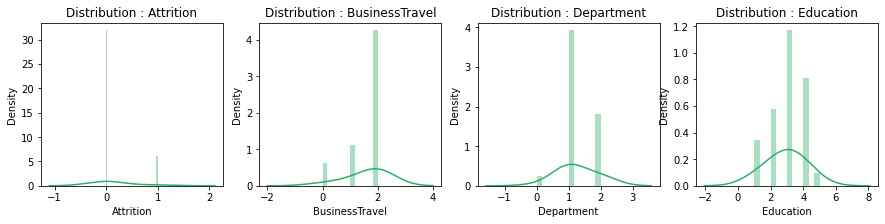

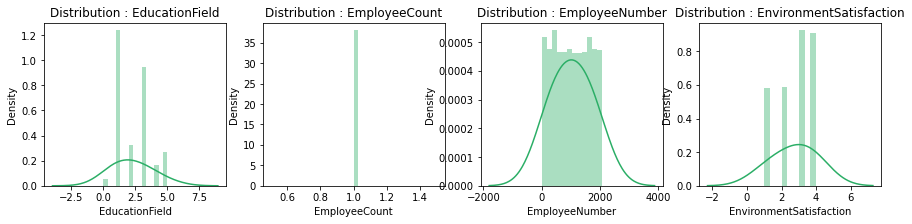

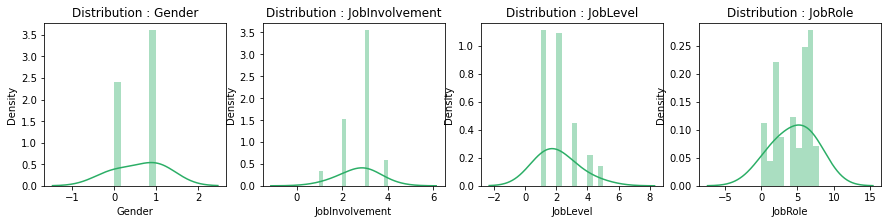

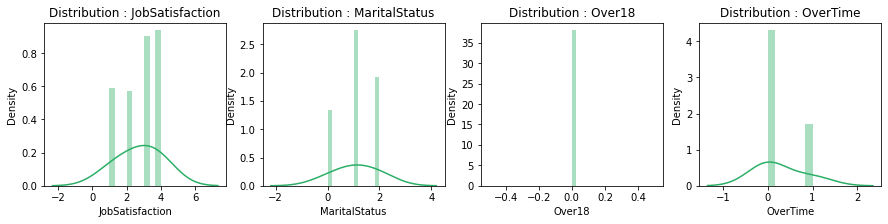

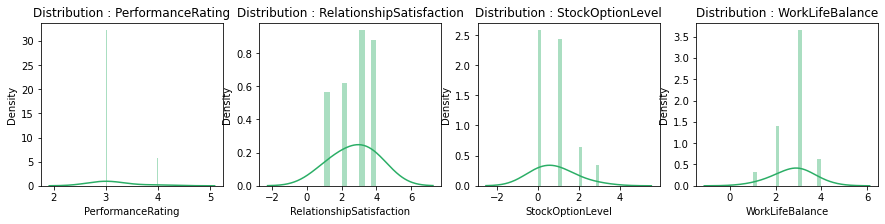

In [12]:
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 4,figsize = (15,3))
    a = 1
    for j in categorical_features[(i*4) : (i*4) + 4]:
        plt.subplot(1,4,a) 
        sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

In [13]:
df1.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18'], inplace = True)
categorical_features.remove('EmployeeCount'); categorical_features.remove('EmployeeNumber') 
categorical_features.remove('Over18'); categorical_features.remove('Attrition')

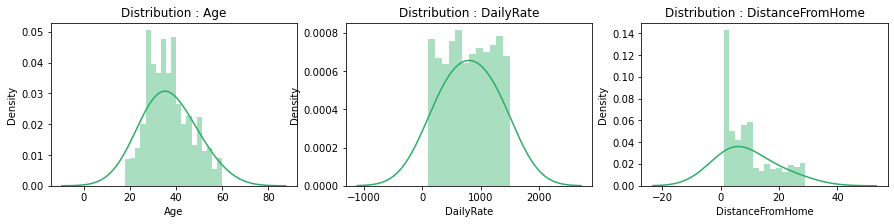

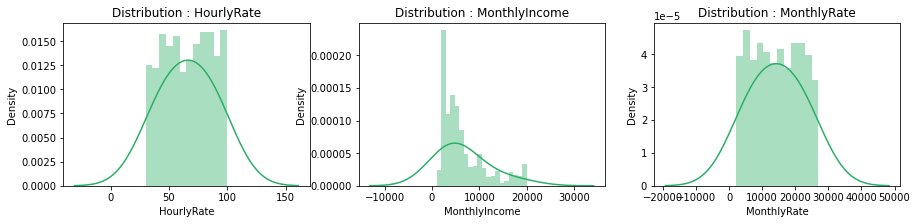

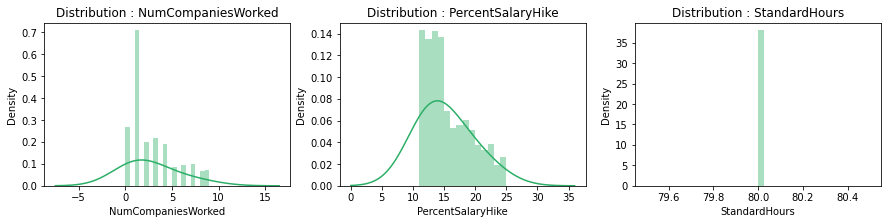

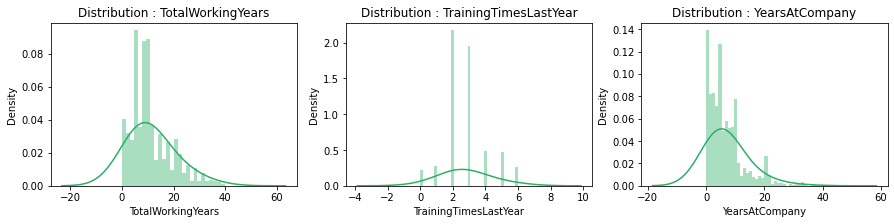

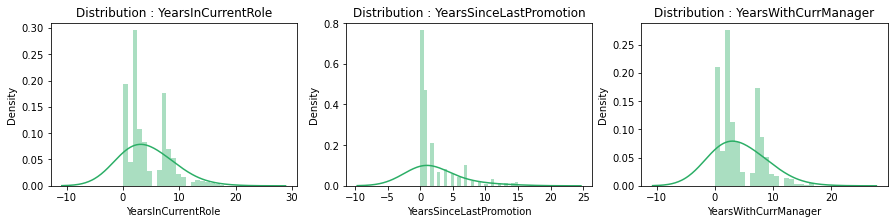

In [14]:
for i in range(5):
    fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,3))
    a = 1
    for j in discrete_features[(i*3) : (i*3) + 3]:
        plt.subplot(1,3,a) 
        sns.distplot(df1[j],kde_kws = {'bw' : 1},color = colors[0]);
        plt.title('Distribution : ' + j)
        a += 1

In [15]:
df1.drop(columns = ['StandardHours'], inplace = True)
discrete_features.remove('StandardHours')

# Target Variable Visualization (Attrition) :

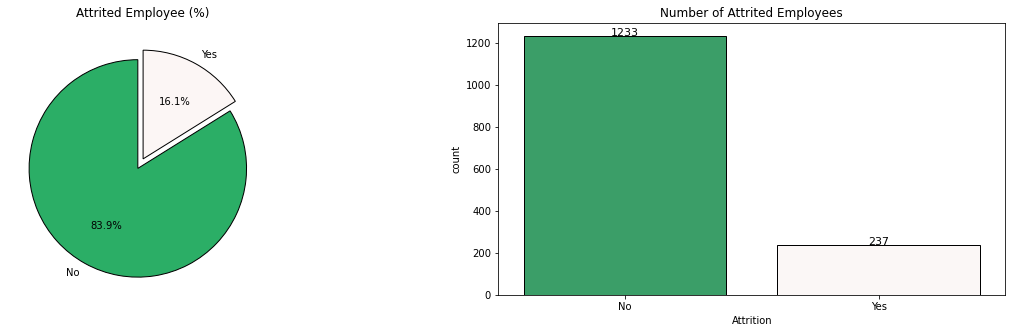

In [16]:
l = list(df1['Attrition'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = list(tf1['Attrition'][j] for j in sorted(df1['Attrition'].unique())),autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Attrited Employee (%)');

plt.subplot(1,2,2)
ax = sns.countplot('Attrition',data = df1, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf1['Attrition'][j] for j in sorted(df1['Attrition'].unique()))
plt.title('Number of Attrited Employees');
plt.show()

The dataset is highly unbalanced!
5.2 : 1 ratio for Retained Employees : Attrited Employee is found!
Due to this, predictions will be biased towards Retention cases.
Visualizations will also display this bias, thus making it difficult to gain insight.
After dropping the single value features and removing the target feature, Attrition, we group the remaining 30 features according to their characteristics & by intuition.
They are divided into 5 groups as follows :
General Employee Information :
Employee - Job Information
Employe - Company Information
Company Features
Finances

In [17]:
l1 = ['Age', 'Gender','MaritalStatus', 'Education', 
      'DistanceFromHome', 'TotalWorkingYears', 'NumCompaniesWorked'] # General Employee Information

l2 = ['EducationField', 'Department', 'JobLevel', 'JobRole', 
      'JobInvolvement', 'OverTime', 'JobSatisfaction'] # Employee Job Information

l3 = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 
      'YearsSinceLastPromotion', 'TrainingTimesLastYear', 'WorkLifeBalance'] # Employee - Company Information

l4 = ['PercentSalaryHike', 'StockOptionLevel', 'BusinessTravel', 
      'PerformanceRating', 'EnvironmentSatisfaction', 'RelationshipSatisfaction'] # Company Information 

l5 = ['MonthlyIncome', 'HourlyRate', 'DailyRate', 'MonthlyRate'] # Finances

df2 = pd.DataFrame()
df2['Attrition'] = df1['Attrition']

posx and posy should be finite values
posx and posy should be finite values


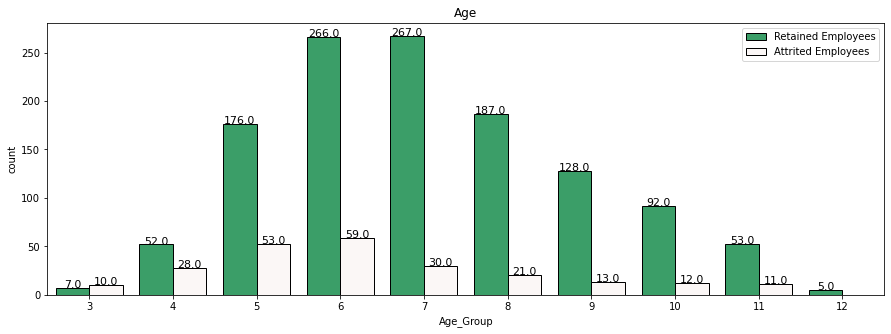

In [18]:
df2['Age_Group'] = [int(i/5) for i in df1['Age']]

plt.figure(figsize = (15,5))
ax = sns.countplot('Age_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Age');

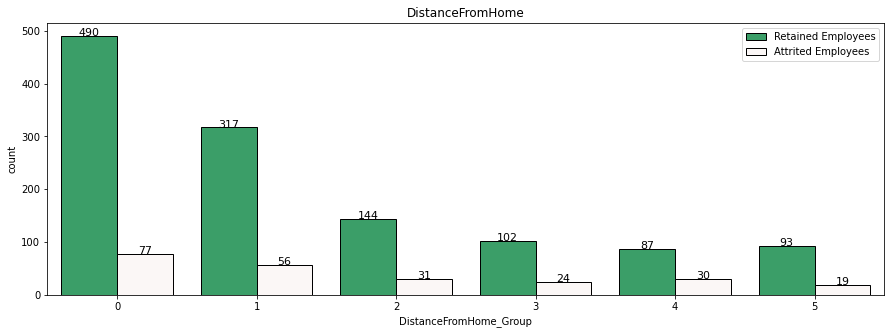

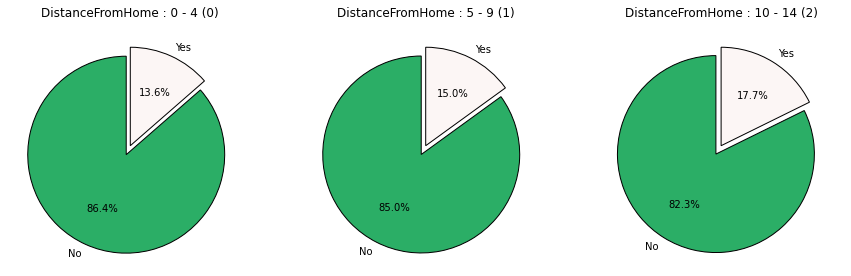

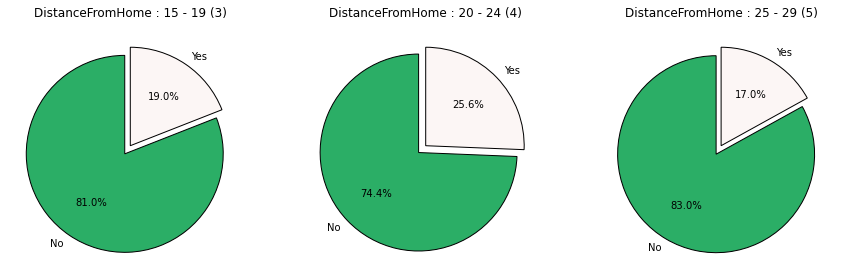

In [19]:
df2['DistanceFromHome_Group'] = [int(i/5) for i in df1['DistanceFromHome']]

plt.figure(figsize = (15,5))
ax = sns.countplot('DistanceFromHome_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right'); plt.title('DistanceFromHome');

for i in range(2):
    fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15)); a = 1
    for j in range(3):
        plt.subplot(1,3,a)
        if i == 0:
            l = list(df2.loc[(df2['DistanceFromHome_Group'] == j)]['Attrition'].value_counts())
        else:
            l = list(df2.loc[(df2['DistanceFromHome_Group'] == (j+3))]['Attrition'].value_counts())
            
        circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
        plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df2['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
                colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
        if i == 0:
            plt.title('DistanceFromHome : ' + str(j*5) + ' - ' + str(j*5 + 4) + ' ('+ str(j) + ')');
        else:
            plt.title('DistanceFromHome : ' + str((j+3)*5) + ' - ' + str((j+3)*5 + 4) + ' ('+ str(j+3) + ')');
        a += 1

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


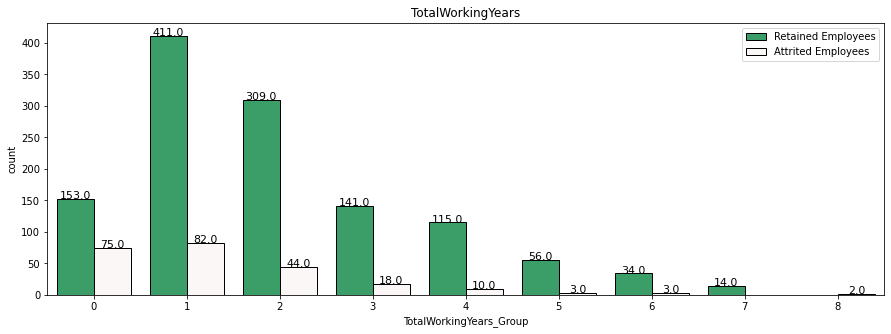

In [20]:
df2['TotalWorkingYears_Group'] = [int(i/5) for i in df1['TotalWorkingYears']]

plt.figure(figsize = (15,5))
ax = sns.countplot('TotalWorkingYears_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('TotalWorkingYears');

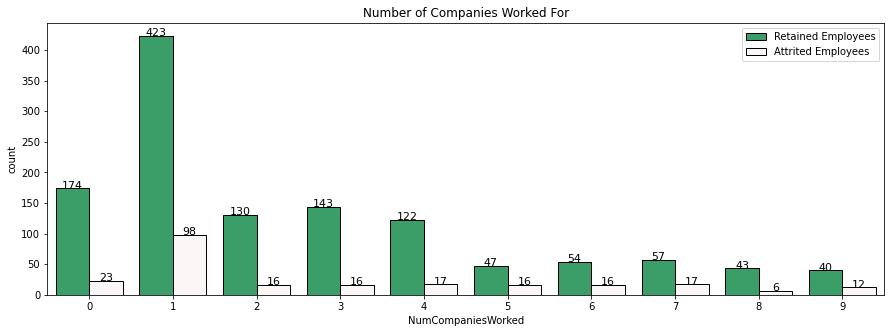

In [21]:
plt.figure(figsize = (15,5))
ax = sns.countplot('NumCompaniesWorked', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'], loc = 'upper right')
plt.title('Number of Companies Worked For');

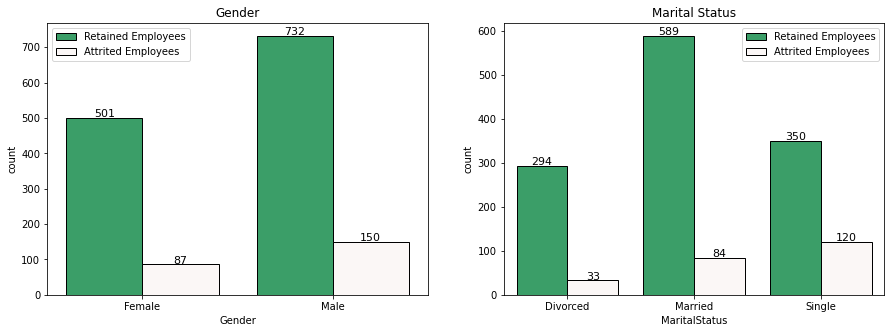

In [22]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
ax = sns.countplot('Gender',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf1['Gender'][j] for j in sorted(df1['Gender'].unique()))
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Gender');

plt.subplot(1,2,2)
ax = sns.countplot('MaritalStatus',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(tf1['MaritalStatus'][j] for j in sorted(df1['MaritalStatus'].unique()))
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Marital Status');

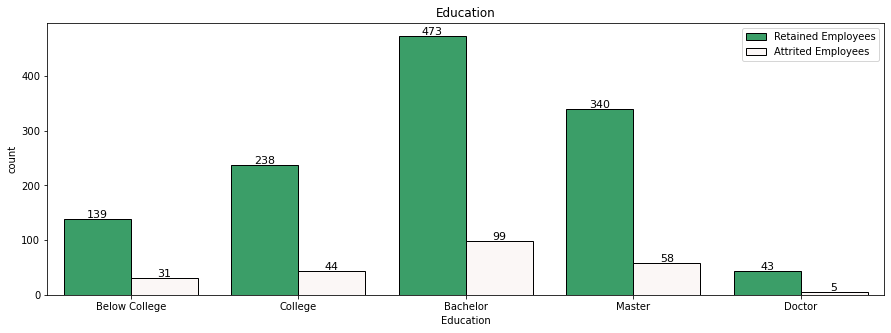

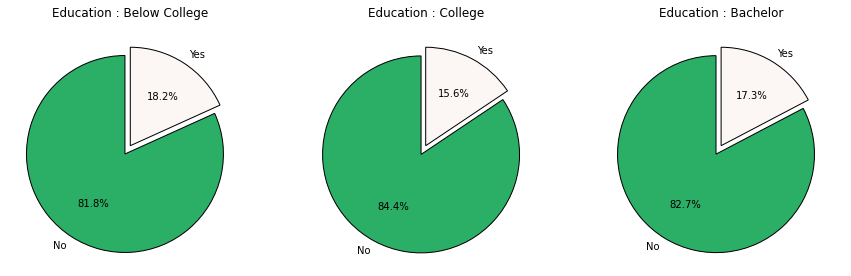

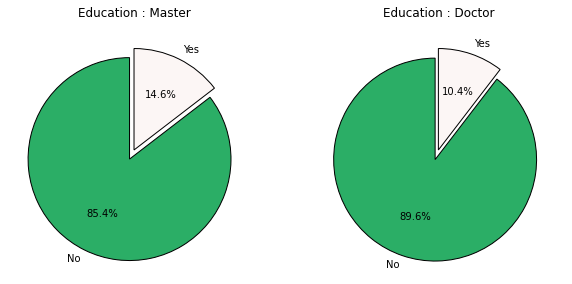

In [23]:
plt.figure(figsize = (15,5))
ax = sns.countplot('Education',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('Education');

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))
for i in range(1,4):
    plt.subplot(1,3,i)
    l = list(df2.loc[(df1['Education'] == i)]['Attrition'].value_counts())
    
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df2['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('Education : ' + ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'][i-1]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
for i in range(2):
    plt.subplot(1,2,i+1)
    l = list(df2.loc[(df1['Education'] == (i+4))]['Attrition'].value_counts())
    
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df2['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('Education : ' + ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'][i-2]);

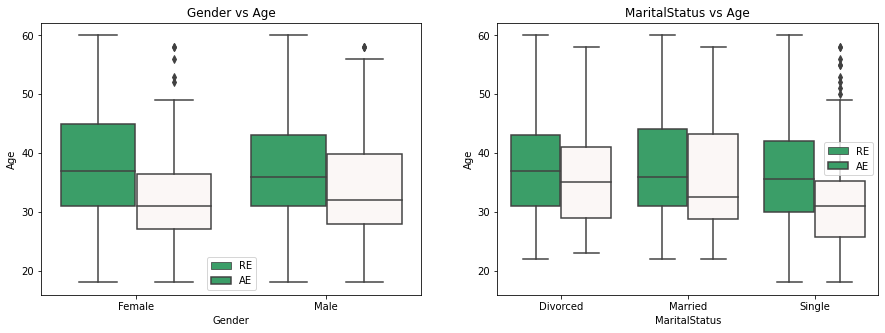

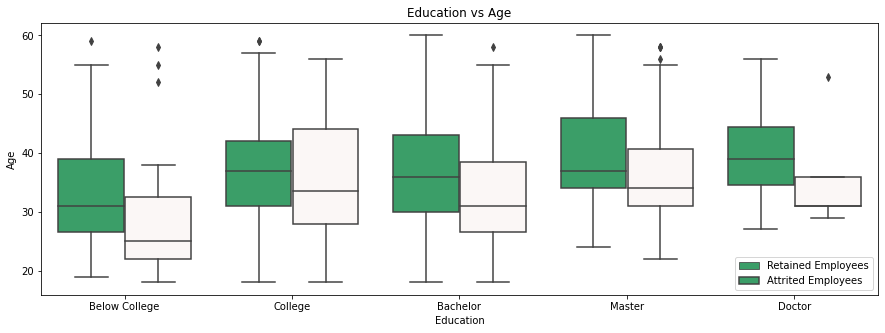

In [24]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in range(len(['Gender', 'MaritalStatus'])):
    plt.subplot(1,2,i+1)
    ax = sns.boxplot(x = ['Gender', 'MaritalStatus'][i],y = 'Age',data = df1,hue = 'Attrition',palette = colors);
    plt.legend(['RE', 'AE'])
    ax.set_xticklabels(tf1[['Gender', 'MaritalStatus'][i]][j] for j in sorted(df1[['Gender', 'MaritalStatus'][i]].unique()))
    plt.title(['Gender', 'MaritalStatus'][i] + ' vs Age');
    
plt.figure(figsize = (15,5))
ax = sns.boxplot(x = 'Education',y = 'Age',data = df1,hue = 'Attrition',palette = colors);
plt.legend(['Retained Employees', 'Attrited Employees'])
ax.set_xticklabels(['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.title('Education' + ' vs Age');

*Employee Job Information :
*It includes features that provide information about the job & it's characteristics!

*List of Features :

*EducationField
*Department
*JobLevel
*JobRole
*JobInvolvement
*OverTime
*JobSatisfaction

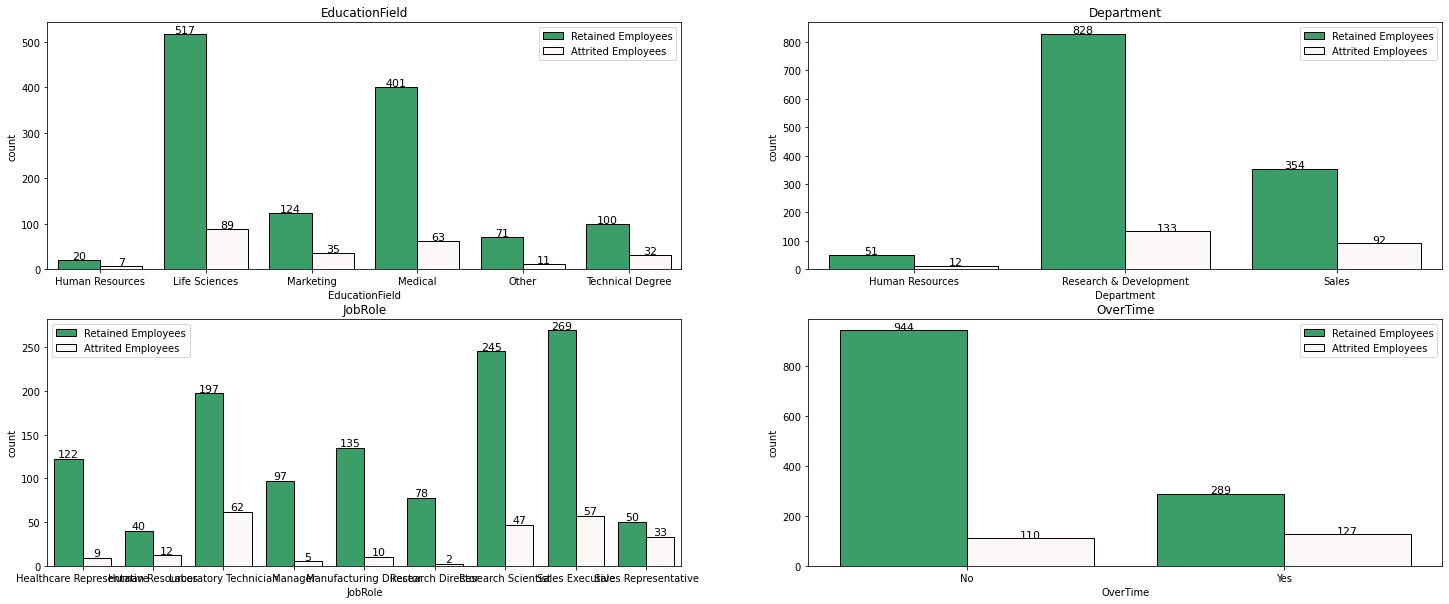

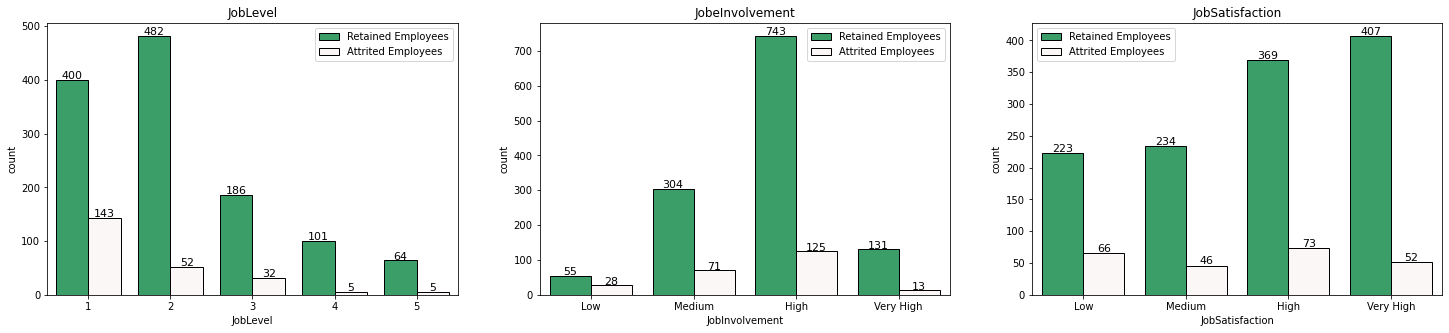

In [25]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (25,10))

for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(['EducationField', 'Department', 'JobRole', 'OverTime'][i],data = df1, 
                       hue = 'Attrition', palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(tf1[['EducationField', 'Department', 'JobRole', 'OverTime'][i]][j] 
                       for j in sorted(df1[['EducationField', 'Department', 'JobRole', 'OverTime'][i]].unique()))
    plt.legend(['Retained Employees', 'Attrited Employees'])
    plt.title(['EducationField', 'Department', 'JobRole', 'OverTime'][i]);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,5))
plt.subplot(1,3,1)
ax = sns.countplot('JobLevel',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('JobLevel');

plt.subplot(1,3,2)
ax = sns.countplot('JobInvolvement',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium','High','Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('JobeInvolvement');

plt.subplot(1,3,3)
ax = sns.countplot('JobSatisfaction',data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium', 'High','Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('JobSatisfaction');

All these graphs pretty much follow the same pattern of more the people in a category, higher is the number of removal of employees.
Hence, it can be deceiving as it does not call out the complete picture. Thus, we will check the attrition percentage of the individual category.

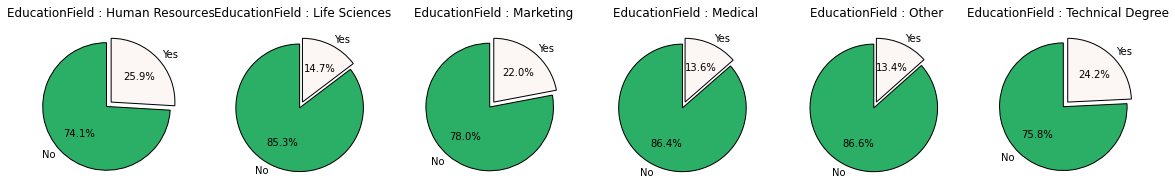

In [26]:
fig = plt.subplots(nrows = 1,ncols = 6,figsize = (20,20))
for i in range(len(df1['EducationField'].unique())):
    plt.subplot(1,6,i+1)
    l = list(df1.loc[(df1['EducationField'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf1['EducationField'][k] for k in sorted(df1['EducationField'].unique()))
    plt.title('EducationField : ' + b[i]);

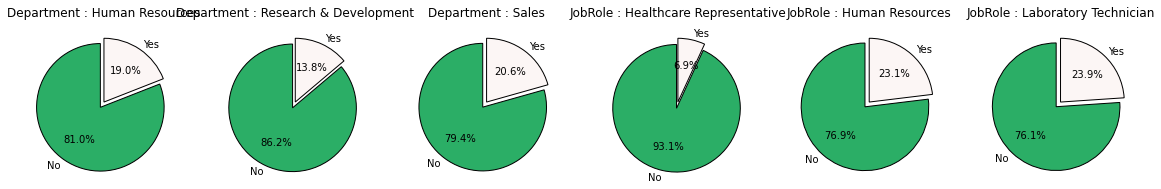

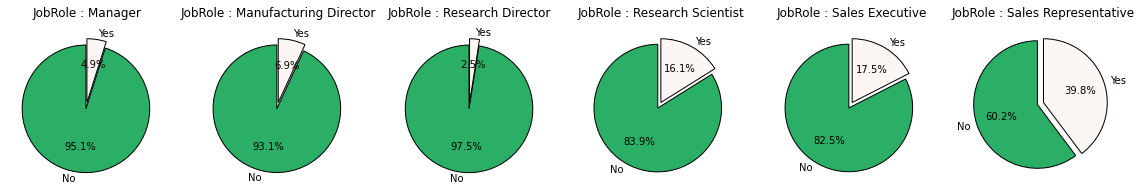

In [27]:
fig = plt.subplots(nrows = 1,ncols = 6,figsize = (20,20))
c = list((sorted(df1['Department'].unique()) + sorted(df1['JobRole'].unique())[:3]))
for i in range(len(c)):
    
    plt.subplot(1,6,i+1)
    if i < 3:
        l = list(df1.loc[(df1['Department'] == i)]['Attrition'].value_counts())
        circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    elif i > 2:
        l = list(df1.loc[(df1['JobRole'] == (i - 3))]['Attrition'].value_counts())
        circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    
    if i < 3:
        b = list(tf1['Department'][k] for k in sorted(df1['Department'].unique()))
        plt.title('Department : ' + b[i]);
    elif i > 2:
        b = list(tf1['JobRole'][k] for k in sorted(df1['JobRole'].unique()))
        plt.title('JobRole : ' + b[i-3]);
        
fig = plt.subplots(nrows = 1,ncols = 6,figsize = (20,20))

for i in range(len(sorted(df1['JobRole'].unique())[3:])):
    
    plt.subplot(1,6,i+1)

    l = list(df1.loc[(df1['JobRole'] == (i+3))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf1['JobRole'][k] for k in sorted(df1['JobRole'].unique()))
    plt.title('JobRole : ' + b[i+3]);

From the above of pie charts, Sales & Human Resource Department employees have a high probability of discontinuing with the company than Research & Development.
When it comes to JobRole, out of the 9 roles, 4 roles display less than 7% of attrition rate whereas the remaining 5 roles have an attrition rate more than 15%.

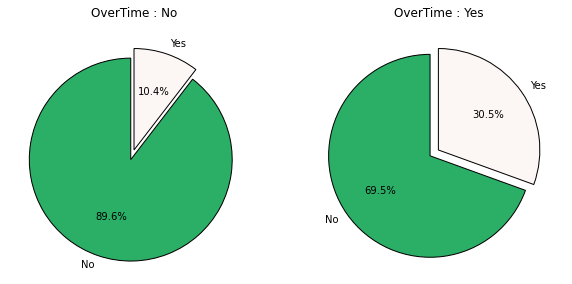

In [28]:
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (10,10))
for i in range(len(df1['OverTime'].unique())):
    plt.subplot(1,2,i+1)
    l = list(df1.loc[(df1['OverTime'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    b = list(tf1['OverTime'][k] for k in sorted(df1['OverTime'].unique()))
    plt.title('OverTime : ' + b[i]);

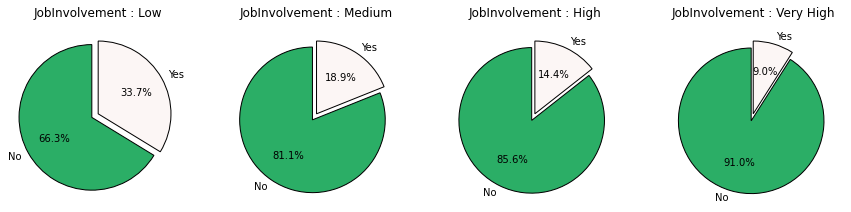

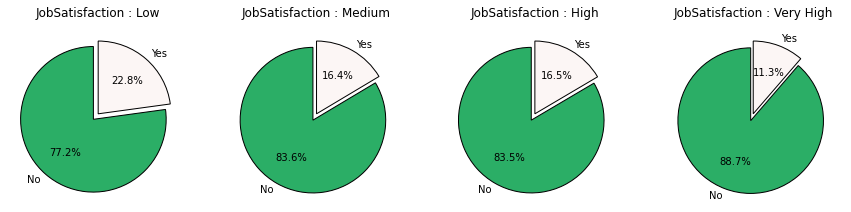

In [29]:
fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))
for i in range(len(df1['JobInvolvement'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df1.loc[(df1['JobInvolvement'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('JobInvolvement : ' + ['Low', 'Medium', 'High', 'Very High'][i]);
        
fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))
for i in range(len(df1['JobSatisfaction'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df1.loc[(df1['JobSatisfaction'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('JobSatisfaction : ' + ['Low', 'Medium', 'High', 'Very High'][i]);


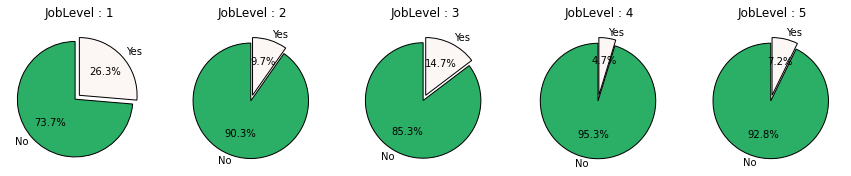

In [30]:
fig = plt.subplots(nrows = 1,ncols = 5,figsize = (15,15))

for i in range(len(df1['JobLevel'].unique())):
    plt.subplot(1,5,i+1)
    l = list(df1.loc[(df1['JobLevel'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('JobLevel : ' + str(i+1));

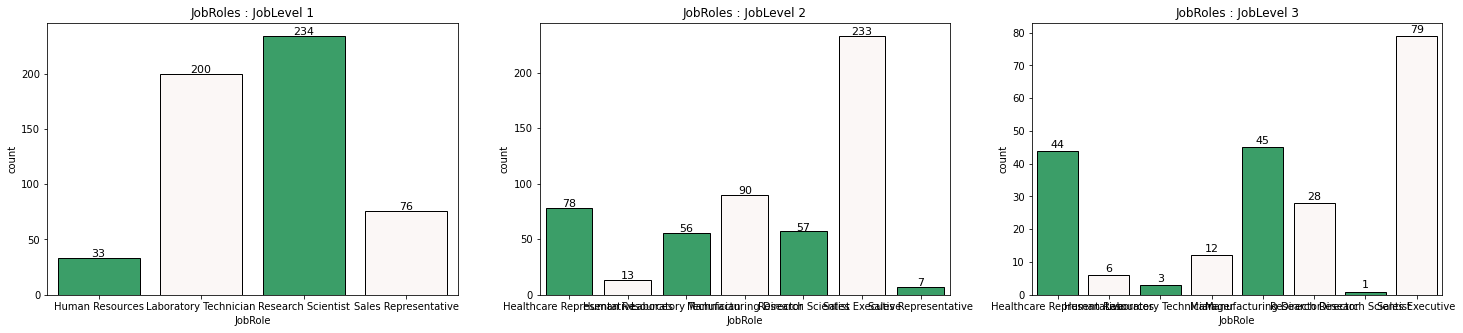

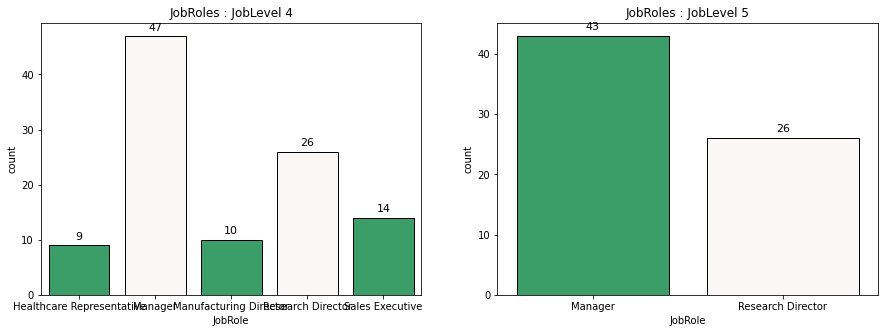

In [31]:
plt.subplots(nrows = 1, ncols = 3, figsize = (25,5))
for i in range(len(sorted(df1['JobLevel'].unique())[:3])):
    plt.subplot(1,3,i+1)
    ax = sns.countplot('JobRole',data = df1[(df1['JobLevel'] == (i+1))], palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 1, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(list(tf1['JobRole'][k] for k in sorted(df1[(df1['JobLevel'] == (i+1))]['JobRole'].unique())))
    plt.title('JobRoles : JobLevel ' + str(i+1));
    
plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
for i in range(len(sorted(df1['JobLevel'].unique())[3:])):
    plt.subplot(1,2,i+1)
    ax = sns.countplot('JobRole',data = df1[(df1['JobLevel'] == (i+4))], palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 1, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(list(tf1['JobRole'][k] for k in sorted(df1[(df1['JobLevel'] == (i+4))]['JobRole'].unique())))
    plt.title('JobRoles : JobLevel ' + str(i+4));

*Employee - Company Information :
*It includes features that provide information employee's association with the company!

*List of Features :

*YearsAtCompany
*YearsInCurrentRole
*YearsWithCurrManager
*YearsSinceLastPromotion
*TrainingTimesLastYear
*WorkLifeBalance

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


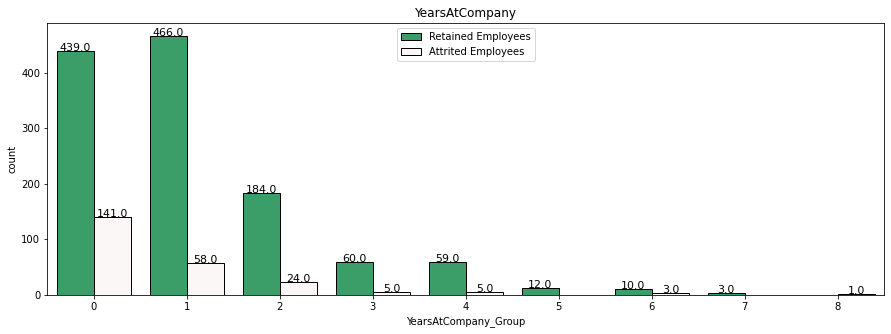

In [32]:
df2['YearsAtCompany_Group'] = [int(i / 5) for i in df1['YearsAtCompany']]

plt.figure(figsize = (15, 5))
ax = sns.countplot('YearsAtCompany_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsAtCompany');

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


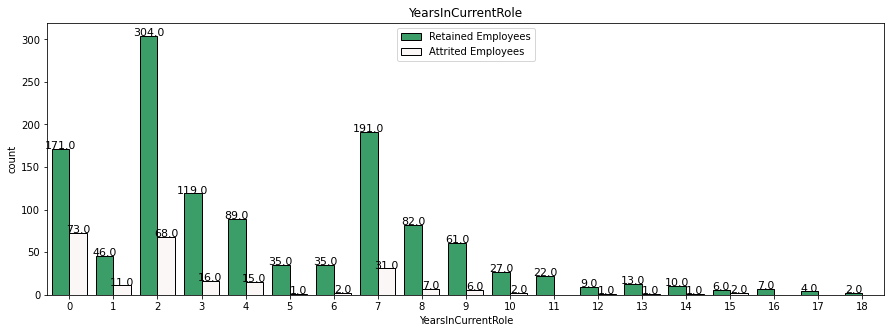

In [33]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('YearsInCurrentRole', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsInCurrentRole');

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


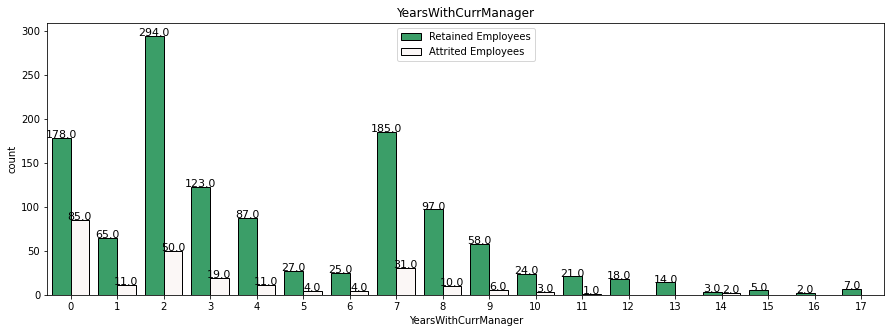

In [34]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('YearsWithCurrManager', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsWithCurrManager');

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


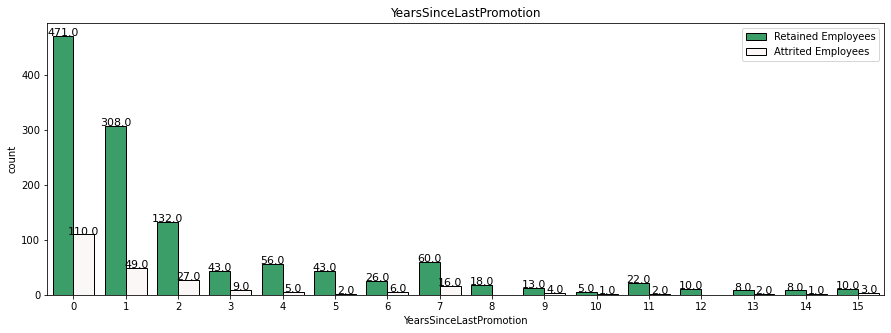

In [35]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('YearsSinceLastPromotion', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('YearsSinceLastPromotion');

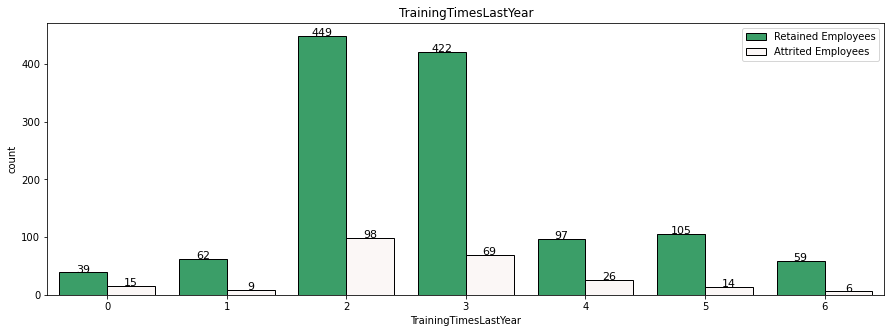

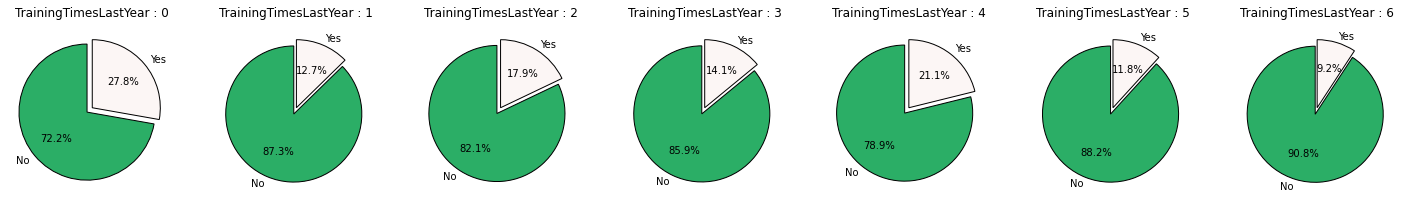

In [36]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('TrainingTimesLastYear', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('TrainingTimesLastYear');

fig = plt.subplots(nrows = 1,ncols = 7,figsize = (25,25))

for i in range(len(df1['TrainingTimesLastYear'].unique())):
    plt.subplot(1,7,i+1)
    l = list(df1.loc[(df1['TrainingTimesLastYear'] == (i))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('TrainingTimesLastYear : ' + str(i));

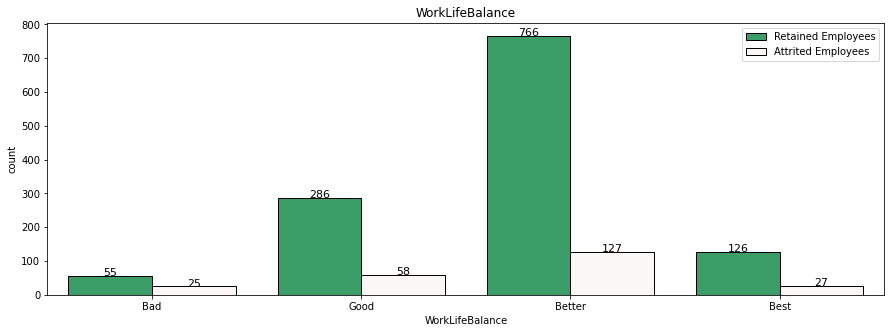

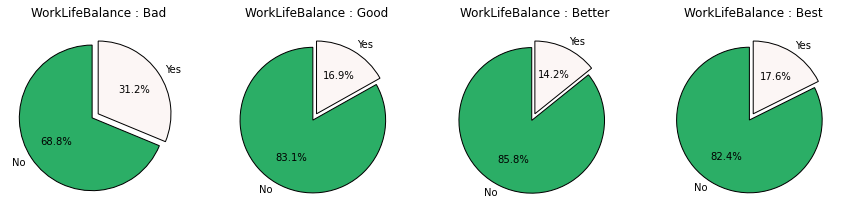

In [37]:
plt.figure(figsize = (15, 5))

ax = sns.countplot('WorkLifeBalance', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black');
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
ax.set_xticklabels(['Bad', 'Good', 'Better', 'Best'])
plt.title('WorkLifeBalance');

fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df1['WorkLifeBalance'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df1.loc[(df1['WorkLifeBalance'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('WorkLifeBalance : ' + ['Bad', 'Good', 'Better', 'Best'][i]);

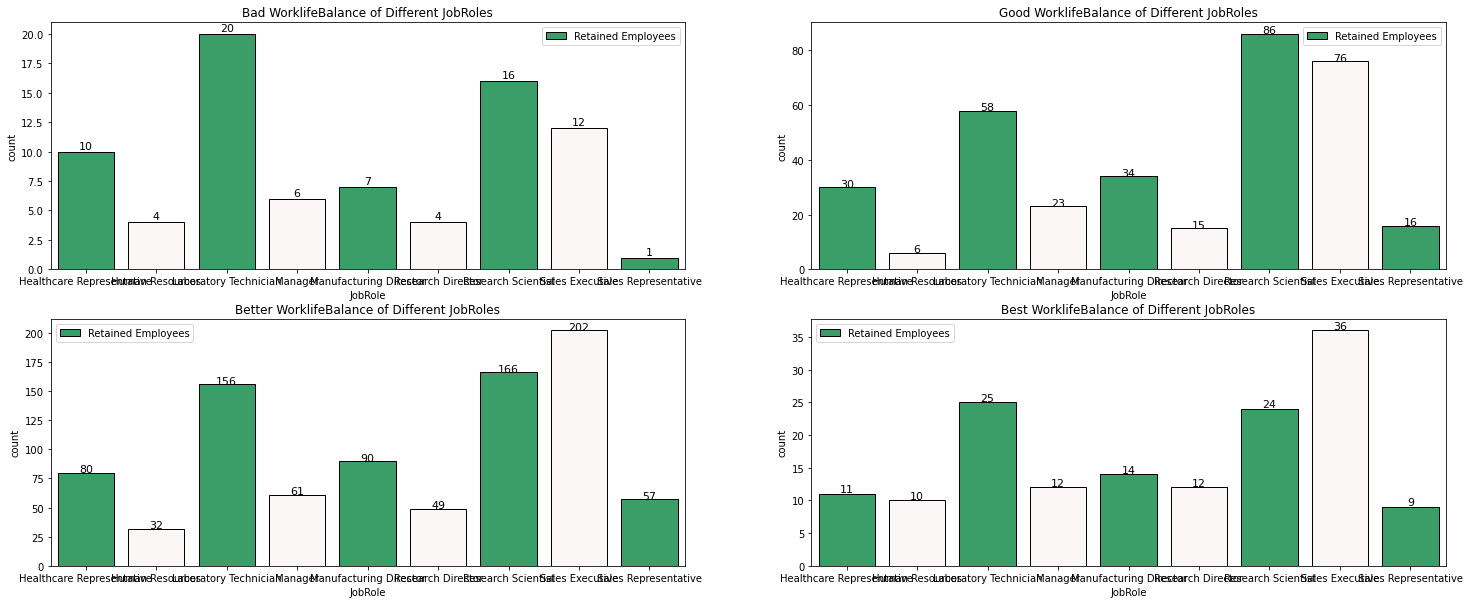

In [38]:
fig = plt.subplots(nrows = 2, ncols = 2, figsize = (25,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot('JobRole', data = df1[df1['WorkLifeBalance'] == (i+1)], palette = colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(tf1['JobRole'][k] for k in sorted(df1[df1['WorkLifeBalance'] == (i+1)]['JobRole'].unique()))
    plt.legend(['Retained Employees', 'Attrited Employees'])
    plt.title(['Bad', 'Good', 'Better', 'Best'][i] + ' WorklifeBalance of Different JobRoles');

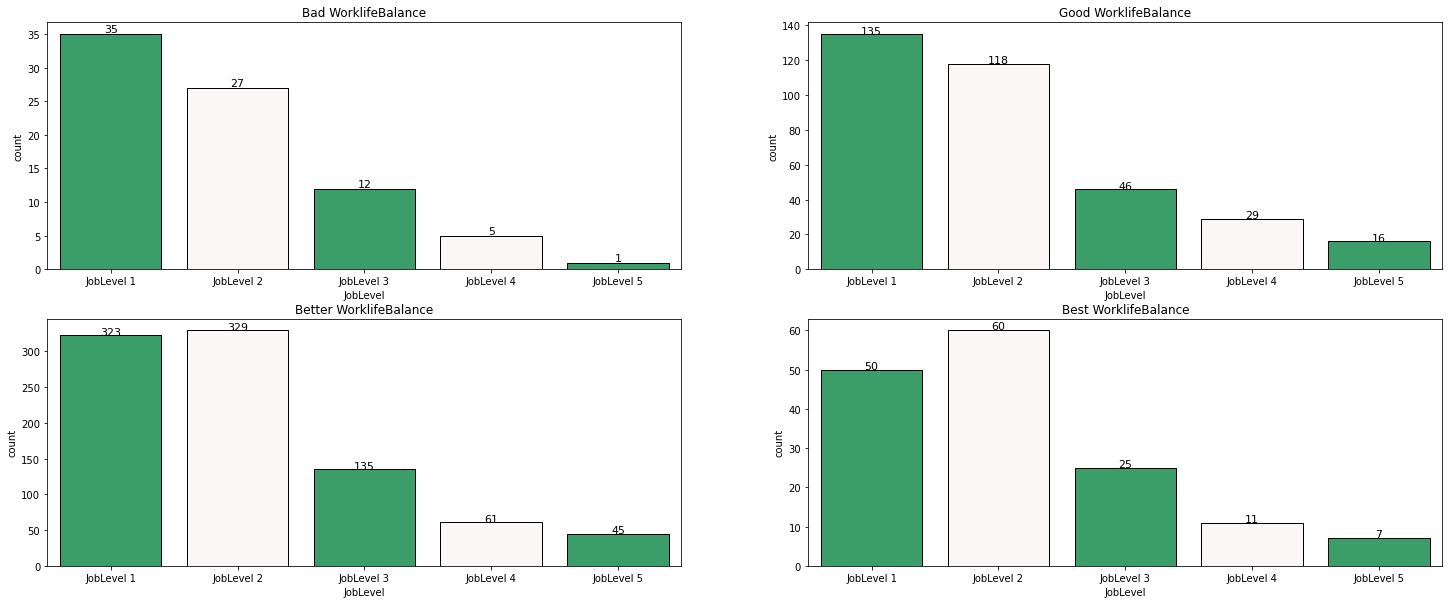

In [39]:
fig = plt.subplots(nrows = 2, ncols = 2, figsize = (25,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.countplot('JobLevel', data = df1[df1['WorkLifeBalance'] == (i+1)], palette = colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 0.25, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(['JobLevel 1', 'JobLevel 2', 'JobLevel 3', 'JobLevel 4', 'JobLevel 5'])
    plt.title(['Bad', 'Good', 'Better', 'Best'][i] + ' WorklifeBalance');

*Company Information :
*It includes features that provide information company's characteristics w.r.t employees!

*List of Features :

*PercentSalaryHike
*StockOptionLevel
*BusinessTravel
*PerformanceRating
*EnvironmentSatisfaction
*RelationshipSatisfaction

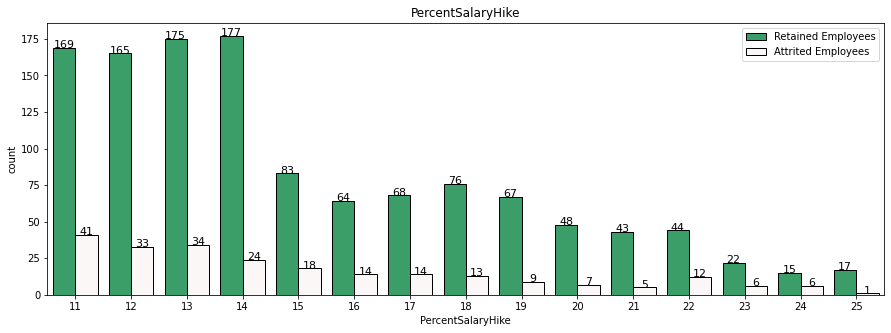

In [40]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('PercentSalaryHike', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('PercentSalaryHike');

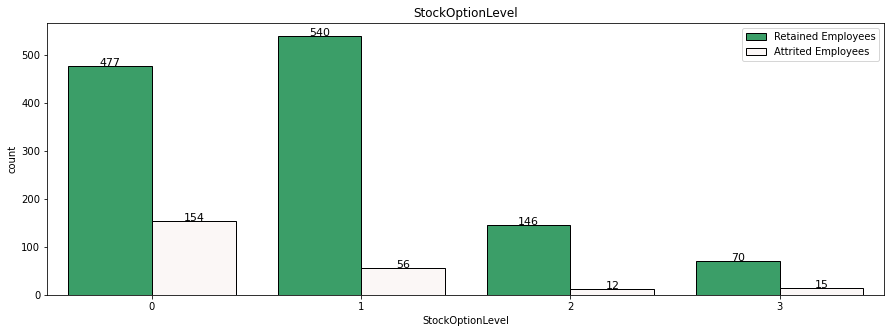

In [41]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('StockOptionLevel', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('StockOptionLevel');

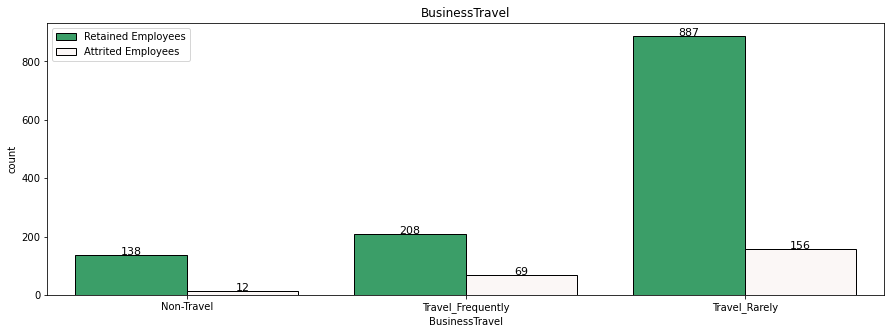

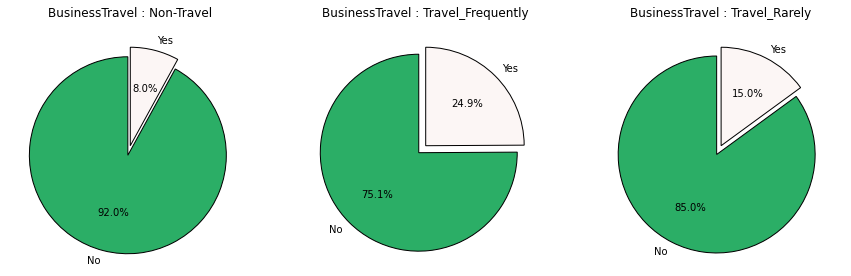

In [42]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('BusinessTravel', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels([tf1['BusinessTravel'][k] for k in sorted(df1['BusinessTravel'].unique())])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('BusinessTravel');

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))

for i in range(len(df1['BusinessTravel'].unique())):
    plt.subplot(1,3,i+1)
    l = list(df1.loc[(df1['BusinessTravel'] == i)]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('BusinessTravel : ' + tf1['BusinessTravel'][i]);

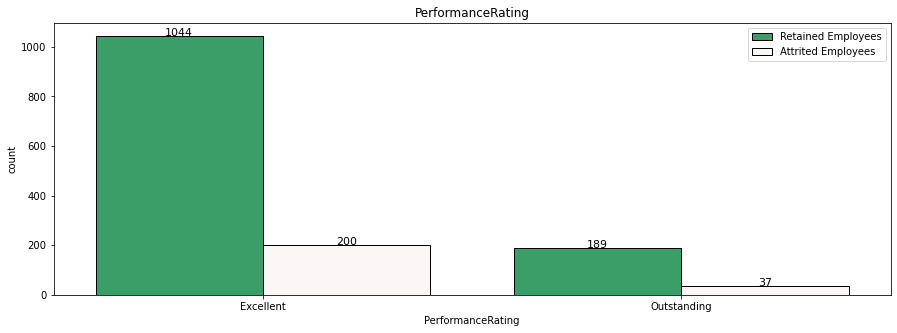

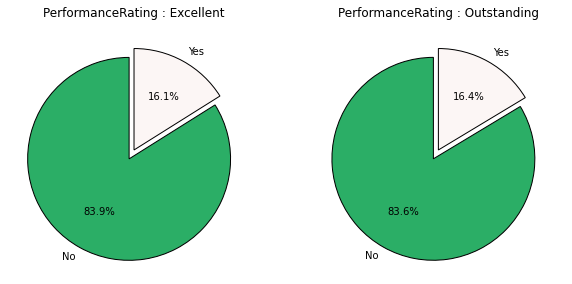

In [43]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('PerformanceRating', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Excellent', 'Outstanding'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('PerformanceRating');

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))

for i in range(len(df1['PerformanceRating'].unique())):
    plt.subplot(1,2,i+1)
    l = list(df1.loc[(df1['PerformanceRating'] == (i+3))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('PerformanceRating : ' + ['Low', 'Good', 'Excellent', 'Outstanding'][i+2]);

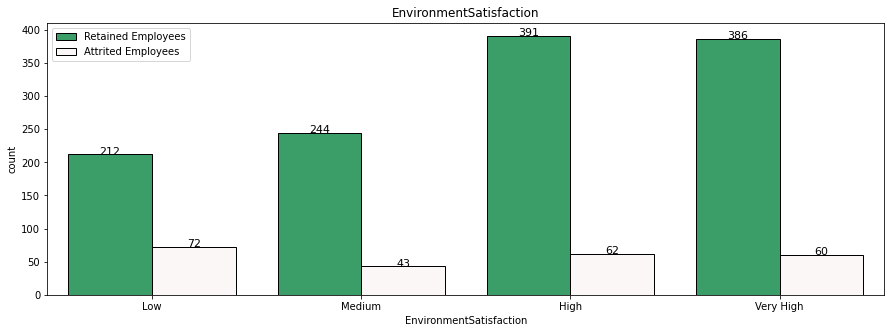

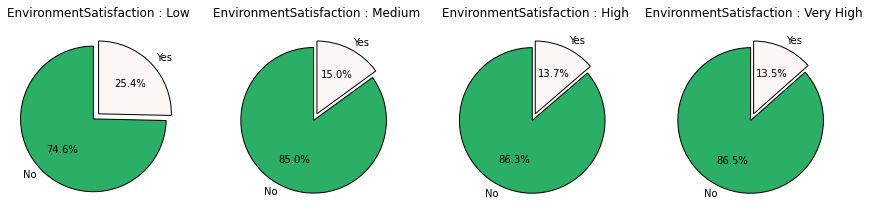

In [44]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('EnvironmentSatisfaction', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium', 'High', 'Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('EnvironmentSatisfaction');

fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df1['EnvironmentSatisfaction'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df1.loc[(df1['EnvironmentSatisfaction'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('EnvironmentSatisfaction : ' + ['Low', 'Medium', 'High', 'Very High'][i]);

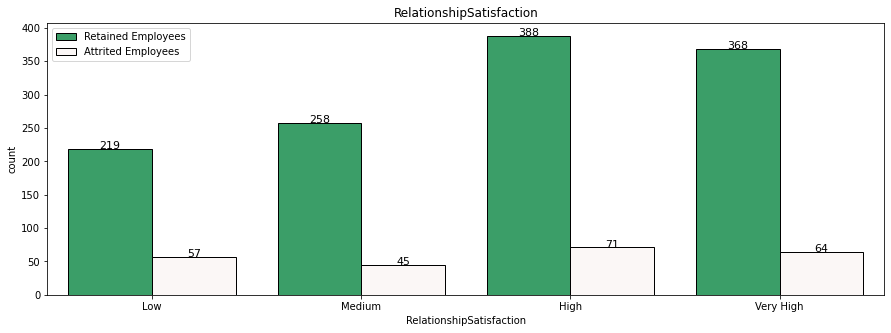

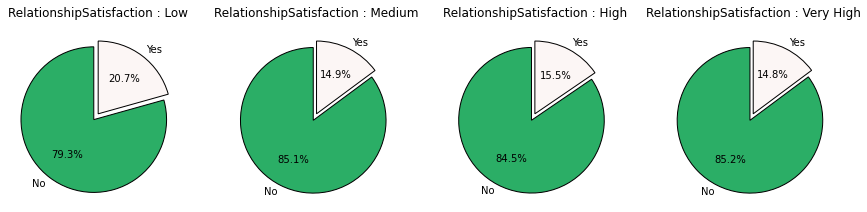

In [45]:
plt.figure(figsize = (15, 5))
ax = sns.countplot('RelationshipSatisfaction', data = df1, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Low', 'Medium', 'High', 'Very High'])
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('RelationshipSatisfaction');

fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

for i in range(len(df1['RelationshipSatisfaction'].unique())):
    plt.subplot(1,4,i+1)
    l = list(df1.loc[(df1['RelationshipSatisfaction'] == (i+1))]['Attrition'].value_counts())
    circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]
    plt.pie(circle,labels = list(tf1['Attrition'][k] for k in sorted(df1['Attrition'].unique())),autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
            colors = colors, wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
    plt.title('RelationshipSatisfaction : ' + ['Low', 'Medium', 'High', 'Very High'][i]);

*Finances :
*It includes features that provide information about employee finances!

*List of Features :

*MonthlyIncome
*HourlyRate
*DailyRate
*MonthlyRate

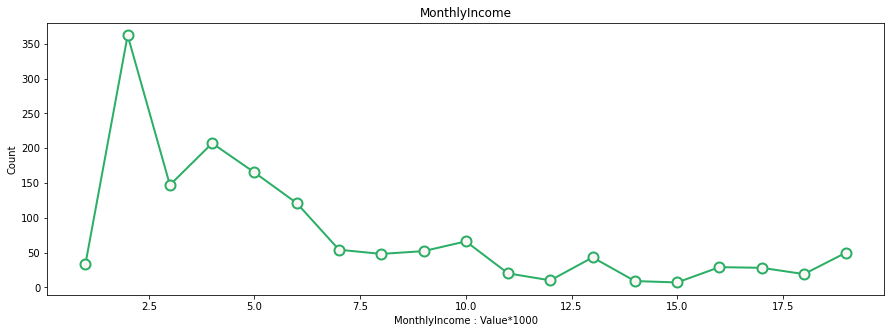

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


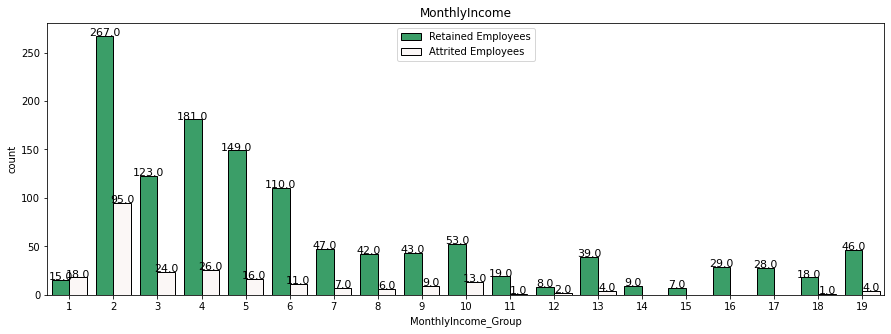

In [46]:
df2['MonthlyIncome_Group'] = [int(i / 1000) for i in df1['MonthlyIncome']]
v1 = [df2['MonthlyIncome_Group'].value_counts()[i] for i in sorted(df2['MonthlyIncome_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df2['MonthlyIncome_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('MonthlyIncome : Value*1000'); plt.ylabel('Count')
plt.title("MonthlyIncome");

plt.figure(figsize = (15, 5))
ax = sns.countplot('MonthlyIncome_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('MonthlyIncome');

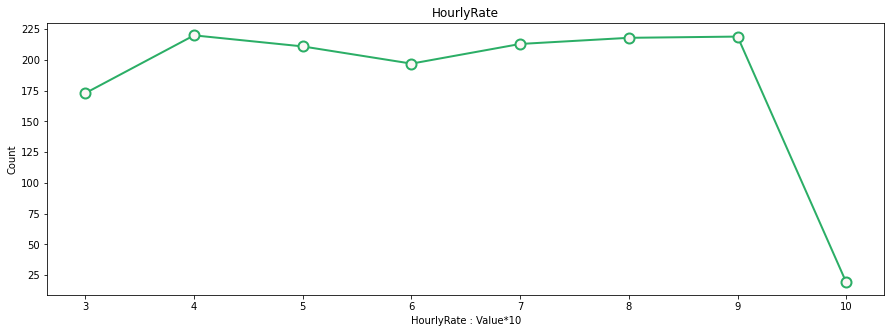

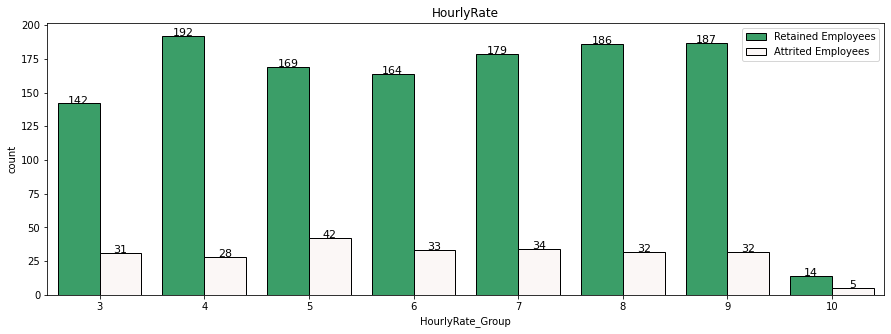

In [47]:
df2['HourlyRate_Group'] = [int(i / 10) for i in df1['HourlyRate']]
v1 = [df2['HourlyRate_Group'].value_counts()[i] for i in sorted(df2['HourlyRate_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df2['HourlyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('HourlyRate : Value*10'); plt.ylabel('Count')
plt.title("HourlyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('HourlyRate_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('HourlyRate');

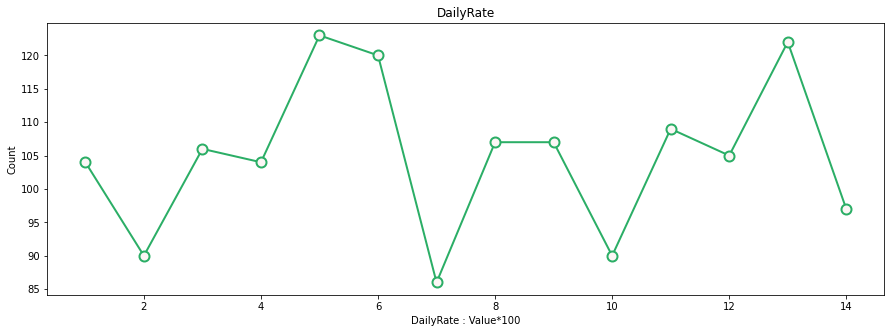

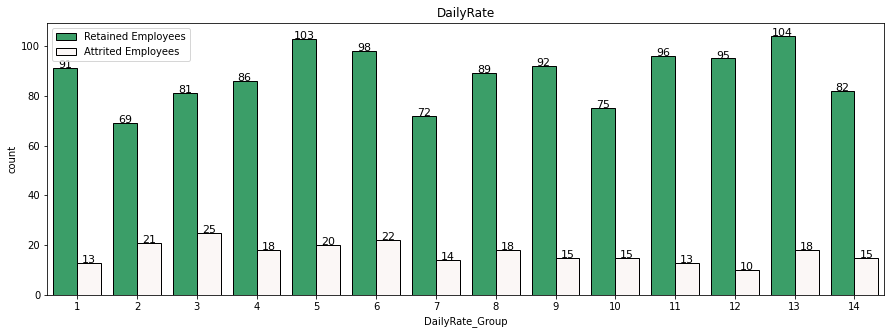

In [48]:
df2['DailyRate_Group'] = [int(i / 100) for i in df1['DailyRate']]
v1 = [df2['DailyRate_Group'].value_counts()[i] for i in sorted(df2['DailyRate_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df2['DailyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('DailyRate : Value*100'); plt.ylabel('Count')
plt.title("DailyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('DailyRate_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('DailyRate');

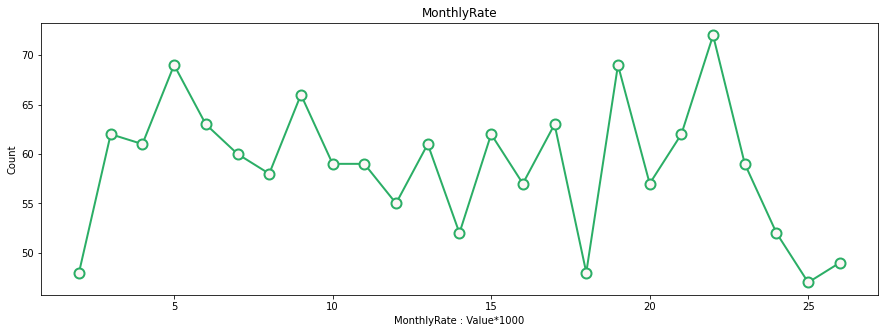

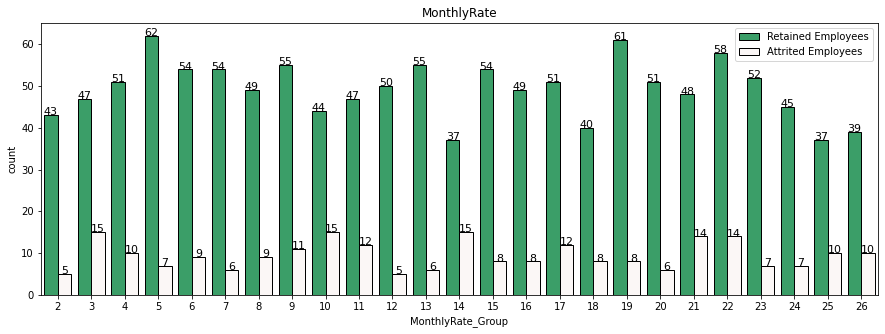

In [49]:
df2['MonthlyRate_Group'] = [int(i / 1000) for i in df1['MonthlyRate']]
v1 = [df2['MonthlyRate_Group'].value_counts()[i] for i in sorted(df2['MonthlyRate_Group'].value_counts().index)]

plt.figure(figsize = (15,5))
ax = sns.lineplot(x = sorted(df2['MonthlyRate_Group'].value_counts().index), y = v1, lw = 2, color = colors[0], marker = 'o', 
                  markersize = 10, markerfacecolor = colors[1], markeredgewidth = 2, markeredgecolor = colors[0], )
plt.xlabel('MonthlyRate : Value*1000'); plt.ylabel('Count')
plt.title("MonthlyRate");

plt.figure(figsize = (15, 5))
ax = sns.countplot('MonthlyRate_Group', data = df2, hue = 'Attrition', palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+0.01, rect.get_height(), horizontalalignment='center', fontsize = 11)
plt.legend(['Retained Employees', 'Attrited Employees'])
plt.title('MonthlyRate');

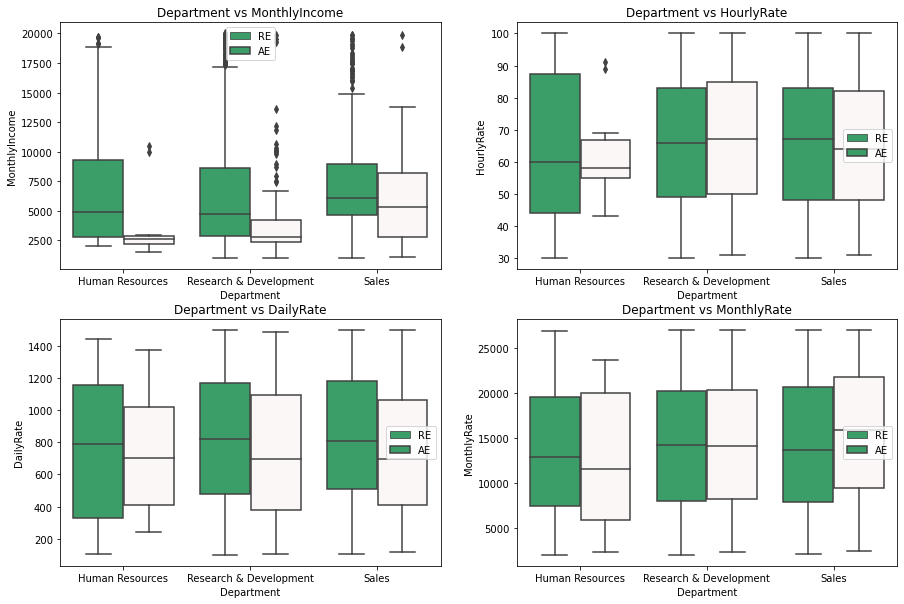

In [50]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(len(l5)):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = 'Department', y = l5[i], data = df1, hue = 'Attrition',palette = colors);
    plt.legend(['RE', 'AE'])
    ax.set_xticklabels([tf1['Department'][k] for k in sorted(df1['Department'].unique())])
    plt.title('Department vs ' + l5[i]);

*MonthlyIncome has too many outlier values. These outliers are probably from the JobLevel 5 which is low in numbers & attrition rate.
*For HourlyRate, Research & Development & Sales department pretty much occupy the same range of values for attrition & non-attrition. Range of attrition values for Human Resources is very small.
*Similar to HourlyRate, same pattern can be observed for Research & Development & Sales department for DailyRate & MonthlyRate.

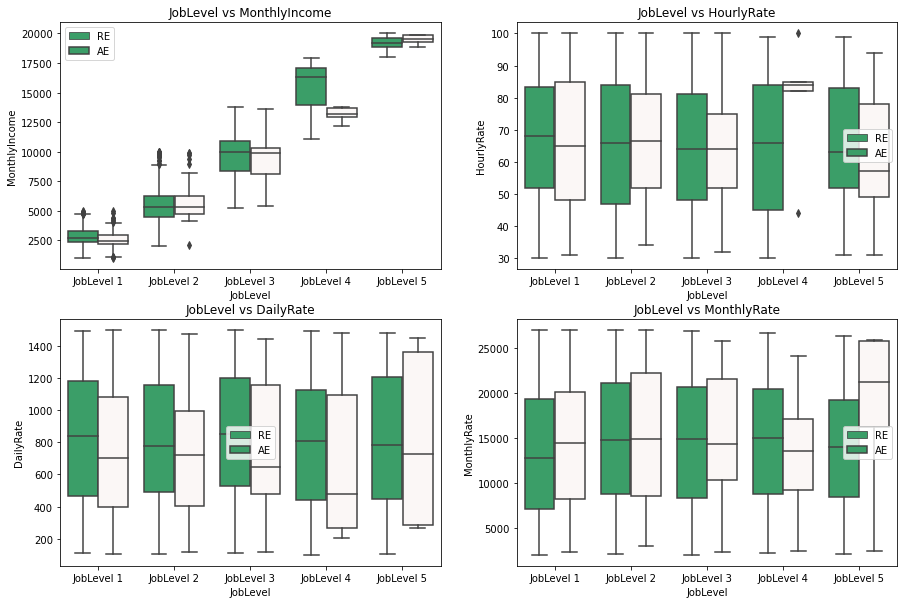

In [51]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(len(l5)):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = 'JobLevel', y = l5[i], data = df1, hue = 'Attrition',palette = colors);
    plt.legend(['RE', 'AE'])
    ax.set_xticklabels(['JobLevel 1', 'JobLevel 2', 'JobLevel 3', 'JobLevel 4', 'JobLevel 5'])
    plt.title('JobLevel vs ' + l5[i]);

# Data Balancing using SMOTE :

In [52]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [53]:
cols = list(df1.columns)
cols.remove('Attrition')

over = SMOTE(sampling_strategy = 0.85)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df1.loc[:,cols]
t1 = df1.loc[:,'Attrition']

steps = [('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({1: 1048, 0: 1233})

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 2)

# Correlation Matrix :

In [55]:
x_train_test = x_train.copy(deep = True)
x_train_test['Attrition'] = y_train

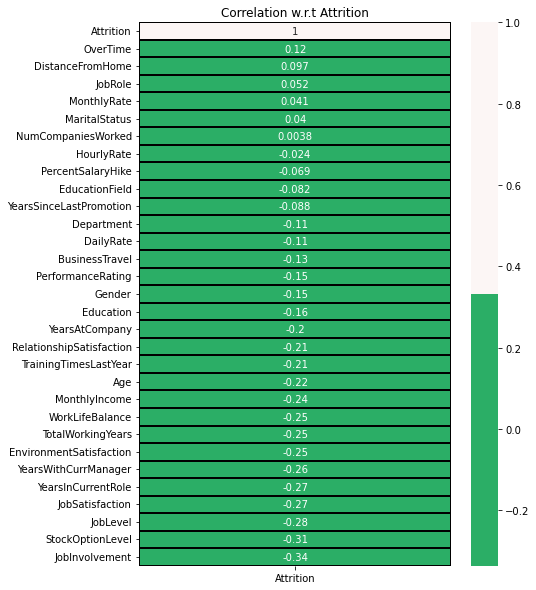

In [56]:
corr = x_train_test.corrwith(x_train_test['Attrition']).sort_values(ascending = False).to_frame()
corr.columns = ['Attrition']
plt.subplots(figsize = (7,10))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Attrition');

# Feature Selection for Categorical Features :

In [57]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

Mutual Information Test :

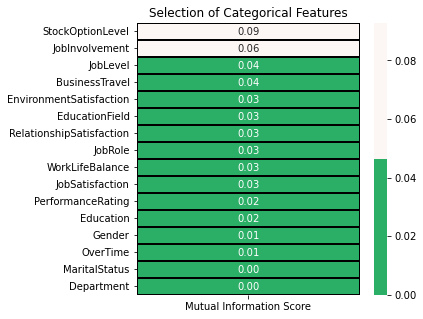

In [58]:
features = x_train.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Mutual Information Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

Chi Squared Test :

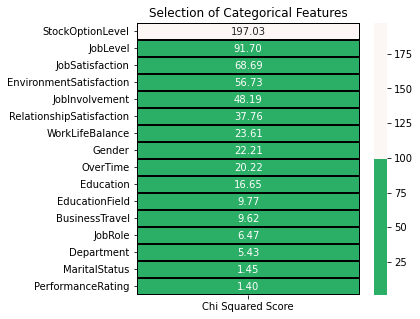

In [59]:
features = x_train.loc[:,categorical_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

# Feature Selection for Numerical Features :
ANOVA Test :

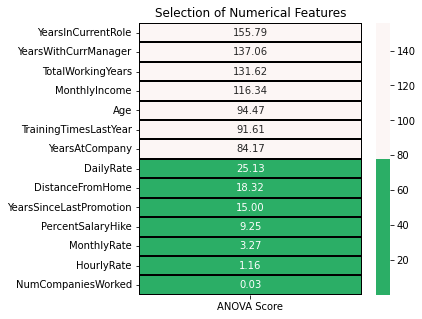

In [60]:
from sklearn.feature_selection import f_classif

features = x_train.loc[:,discrete_features]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [61]:
x_train = x_train.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

x_test = x_test.drop(columns = ['MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 
                                  'YearsSinceLastPromotion', 'DistanceFromHome','DailyRate',
                                  'PerformanceRating', 'Department', 'JobRole', 'EducationField', 
                                  'BusinessTravel', 'MaritalStatus' ,'Gender'])

Data Scaling :

In [62]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
x_train['MonthlyIncome'] = mms.fit_transform(x_train[['MonthlyIncome']]); x_test['MonthlyIncome'] = mms.transform(x_test[['MonthlyIncome']])
x_train['TotalWorkingYears'] = mms.fit_transform(x_train[['TotalWorkingYears']]); x_test['TotalWorkingYears'] = mms.transform(x_test[['TotalWorkingYears']])
x_train['YearsAtCompany'] = mms.fit_transform(x_train[['YearsAtCompany']]); x_test['YearsAtCompany'] = mms.transform(x_test[['YearsAtCompany']])
x_train['YearsInCurrentRole'] = mms.fit_transform(x_train[['YearsInCurrentRole']]); x_test['YearsInCurrentRole'] = mms.transform(x_test[['YearsInCurrentRole']])
x_train['YearsWithCurrManager'] = mms.fit_transform(x_train[['YearsWithCurrManager']]); x_test['YearsWithCurrManager'] = mms.transform(x_test[['YearsWithCurrManager']])

# Standardization
x_train['Age'] = ss.fit_transform(x_train[['Age']]); x_test['Age'] = ss.transform(x_test[['Age']])
x_train['Education'] = ss.fit_transform(x_train[['Education']]); x_test['Education'] = ss.transform(x_test[['Education']])
x_train['EnvironmentSatisfaction'] = ss.fit_transform(x_train[['EnvironmentSatisfaction']]); x_test['EnvironmentSatisfaction'] = ss.transform(x_test[['EnvironmentSatisfaction']])
x_train['JobInvolvement'] = ss.fit_transform(x_train[['JobInvolvement']]); x_test['JobInvolvement'] = ss.transform(x_test[['JobInvolvement']])
x_train['JobLevel'] = ss.fit_transform(x_train[['JobLevel']]); x_test['JobLevel'] = ss.transform(x_test[['JobLevel']])
x_train['JobSatisfaction'] = ss.fit_transform(x_train[['JobSatisfaction']]); x_test['JobSatisfaction'] = ss.transform(x_test[['JobSatisfaction']])
x_train['OverTime'] = ss.fit_transform(x_train[['OverTime']]); x_test['OverTime'] = ss.transform(x_test[['OverTime']])
x_train['RelationshipSatisfaction'] = ss.fit_transform(x_train[['RelationshipSatisfaction']]); x_test['RelationshipSatisfaction'] = ss.transform(x_test[['RelationshipSatisfaction']])
x_train['StockOptionLevel'] = ss.fit_transform(x_train[['StockOptionLevel']]); x_test['StockOptionLevel'] = ss.transform(x_test[['StockOptionLevel']])
x_train['TrainingTimesLastYear'] = ss.fit_transform(x_train[['TrainingTimesLastYear']]); x_test['TrainingTimesLastYear'] = ss.transform(x_test[['TrainingTimesLastYear']])
x_train['WorkLifeBalance'] = ss.fit_transform(x_train[['WorkLifeBalance']]); x_test['WorkLifeBalance'] = ss.transform(x_test[['WorkLifeBalance']])

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

Selecting the features from the above conducted tests and splitting the data into 85 - 15 train - test groups.

In [64]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

1] XGBoostClassifier :

In [65]:
from xgboost import XGBClassifier

In [66]:
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  92.36%
ROC_AUC Score :  87.62%


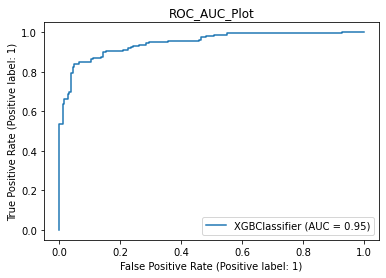

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       183
           1       0.88      0.86      0.87       160

    accuracy                           0.88       343
   macro avg       0.88      0.88      0.88       343
weighted avg       0.88      0.88      0.88       343



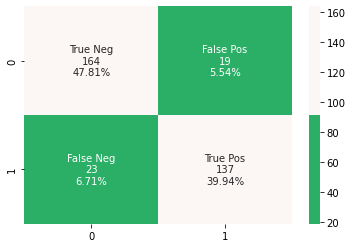

In [67]:
model(classifier_xgb,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_xgb,x_test.values,y_test.values)

2] LGBMClassifier :

In [68]:
from lightgbm import LGBMClassifier

ModuleNotFoundError: No module named 'lightgbm'

3] Decision Tree Classifier :

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score :  80.39%
ROC_AUC Score :  75.64%


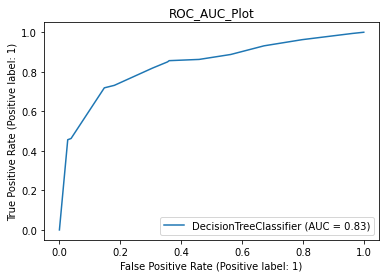

              precision    recall  f1-score   support

           0       0.81      0.69      0.75       183
           1       0.70      0.82      0.76       160

    accuracy                           0.75       343
   macro avg       0.76      0.76      0.75       343
weighted avg       0.76      0.75      0.75       343



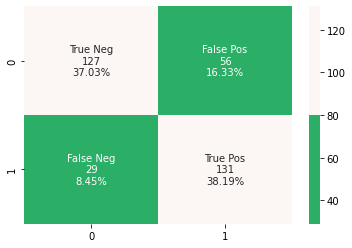

In [73]:
model(classifier_dt,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_dt,x_test.values,y_test.values)

4] RandomForest Classifier :

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  87.93%
ROC_AUC Score :  81.88%


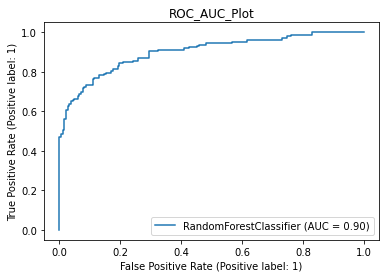

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       183
           1       0.84      0.77      0.80       160

    accuracy                           0.82       343
   macro avg       0.82      0.82      0.82       343
weighted avg       0.82      0.82      0.82       343



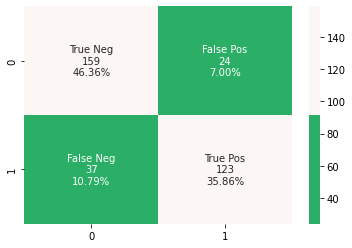

In [76]:
model(classifier_rf,x_train.values,y_train.values,x_test.values,y_test.values)
model_evaluation(classifier_rf,x_test.values,y_test.values)